In [11]:
#Linear regression Problems:
#loading the csv file into the dataset
import pandas as pd
import numpy as np
neo_data = pd.read_csv("C:\\Users\\everybody\\Downloads\\neo.csv\\neo.csv")

#first normalizing the values of the dataset
final_neo_data = neo_data[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]

#ensuring that the values are numeric:
for column in ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']:
    final_neo_data.loc[:,column] = pd.to_numeric(final_neo_data[column], errors='coerce')

#normalizing the values using min max normalization
final_neo_data = (final_neo_data - final_neo_data.min())/(final_neo_data.max() - final_neo_data.min())

#adding the hazardous column as that's our target
final_neo_data['hazardous'] = neo_data['hazardous']
final_neo_data

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.031607,0.031607,0.056447,0.733141,0.312891,False
1,0.006999,0.006999,0.309922,0.821364,0.449312,True
2,0.019039,0.019039,0.481680,0.665740,0.358782,False
3,0.002531,0.002531,0.103726,0.339986,0.541093,False
4,0.006714,0.006714,0.179632,0.618634,0.453066,True
...,...,...,...,...,...,...
90831,0.000685,0.000685,0.219081,0.164371,0.657906,False
90832,0.000427,0.000427,0.193893,0.726208,0.699625,False
90833,0.000827,0.000827,0.031097,0.379640,0.641218,False
90834,0.000177,0.000177,0.291384,0.918352,0.774718,False


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = final_neo_data.drop(columns=['hazardous','absolute_magnitude'])
y = final_neo_data['absolute_magnitude']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#fitting the data
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)


In [16]:
"""
Q2: Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1. 
Perform prediction on the test data and compare the metric values between train and test set.
"""
#Calculate MSE, RMSE, MAPE, and R² for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

#Calculate MSE, RMSE, MAPE, and R² for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Output the results
print("Training Set Metrics:")
print(f"  MSE: {mse_train}")
print(f"  RMSE: {rmse_train}")
print(f"  MAPE: {mape_train}%")
print(f"  R²: {r2_train}")

print("\nTest Set Metrics:")
print(f"  MSE: {mse_test}")
print(f"  RMSE: {rmse_test}")
print(f"  MAPE: {mape_test}%")
print(f"  R²: {r2_test}")


Training Set Metrics:
  MSE: 0.007224179371454924
  RMSE: 0.0849951726361852
  MAPE: 11.872169460490133%
  R²: 0.5037276752365526

Test Set Metrics:
  MSE: 0.016434640732185327
  RMSE: 0.12819766274072755
  MAPE: inf%
  R²: -0.12376991350938105


C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


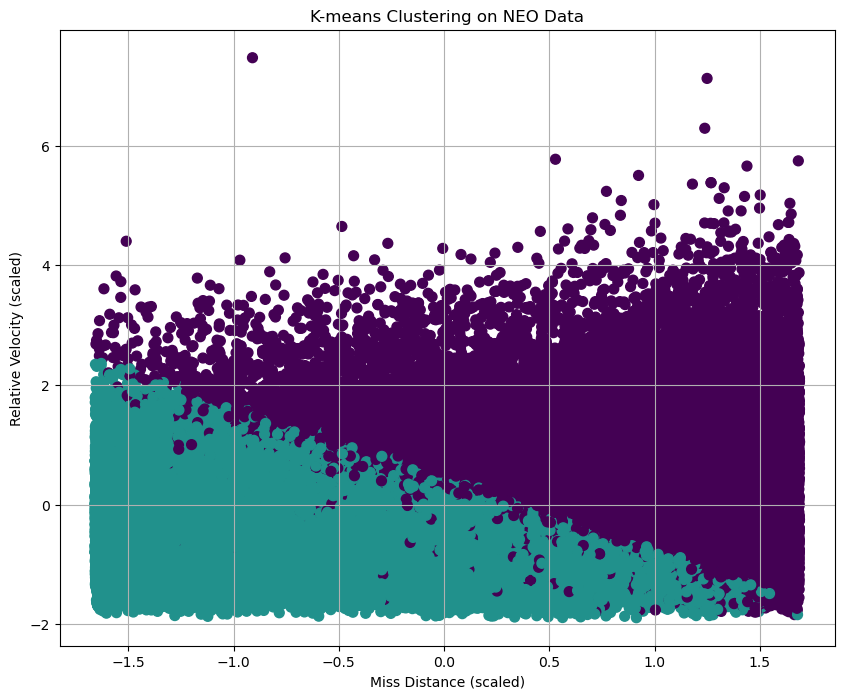

In [17]:
"""
K means clustering(implementation)
"""
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#selecting the features from the dataset
X = neo_data[['miss_distance', 'relative_velocity', 'est_diameter_min', 'est_diameter_max']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_
neo_data['Cluster'] = clusters

#visualizing the data
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-means Clustering on NEO Data')
plt.xlabel('Miss Distance (scaled)')
plt.ylabel('Relative Velocity (scaled)')
plt.grid(True)
plt.show()



In [18]:
"""
From the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index
"""
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
sil_score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {sil_score}')

ch_score = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz (CH) Score: {ch_score}')

db_index = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin (DB) Index: {db_index}')


Silhouette Score: 0.3535915123650158
Calinski-Harabasz (CH) Score: 33969.52376752038
Davies-Bouldin (DB) Index: 0.867005898402556


C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

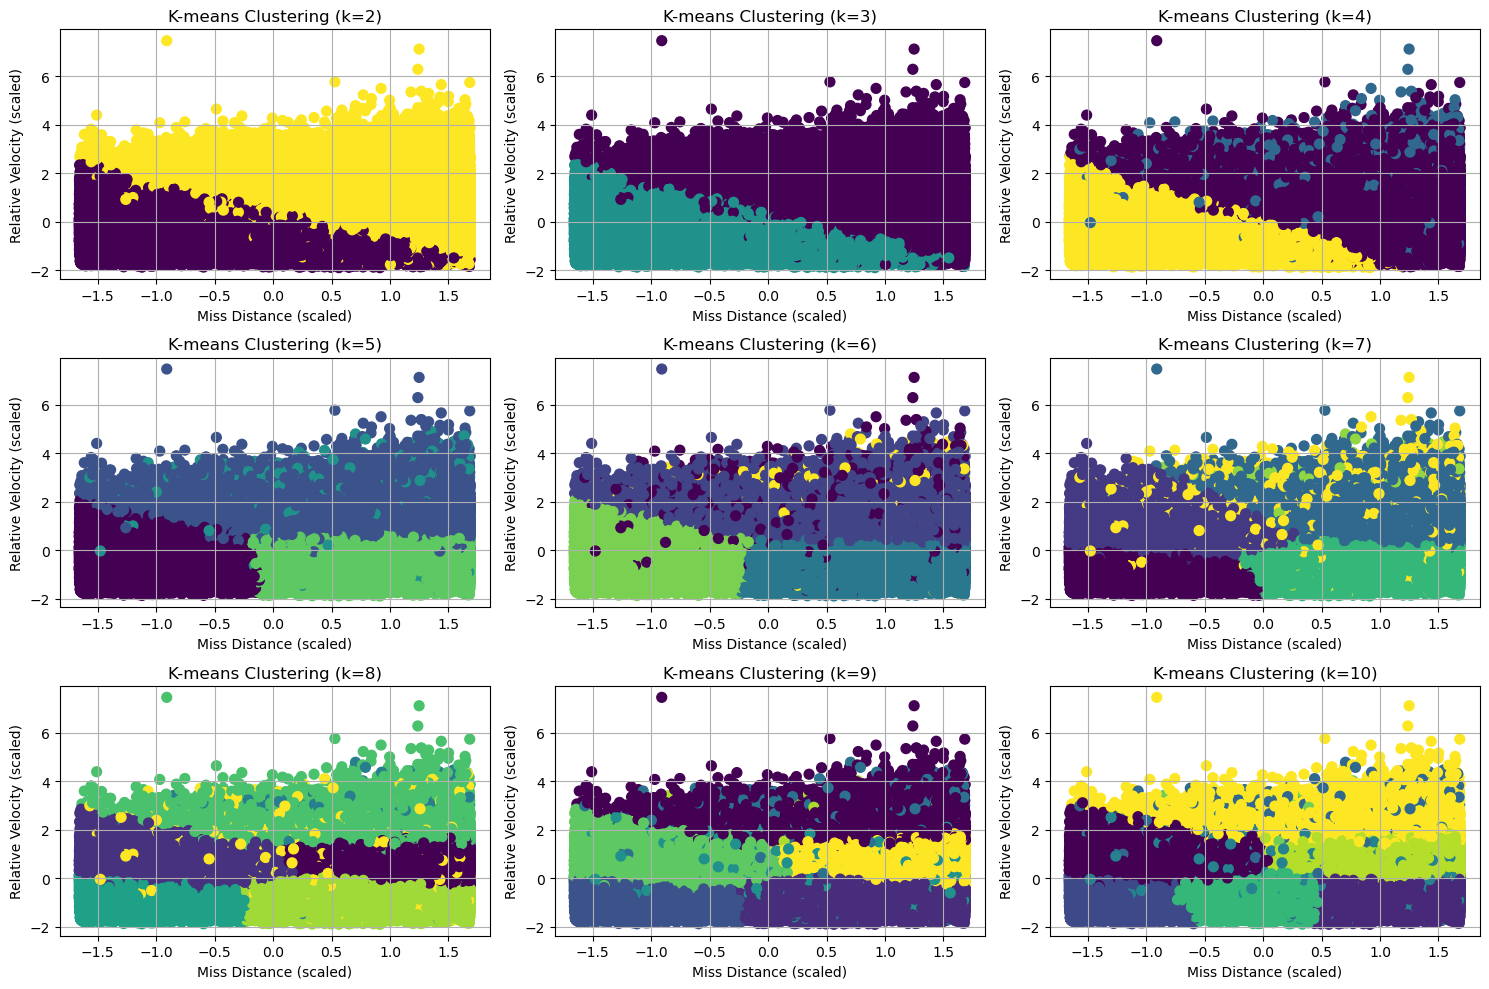

In [20]:
"""
 Perform k-means clustering for different values of k. Evaluate the above scores for each k value. 
Make a plot of the values against the k value to determine the optimal cluster count.
"""

#Perform K-means clustering for different values of k and visualize
k_values = range(2, 11)  # Cluster values from 2 to 10

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    clusters = kmeans.labels_
    
    # Plot the clusters for each k
    plt.subplot(3, 3, i)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Miss Distance (scaled)')
    plt.ylabel('Relative Velocity (scaled)')
    plt.grid(True)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\everybody\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

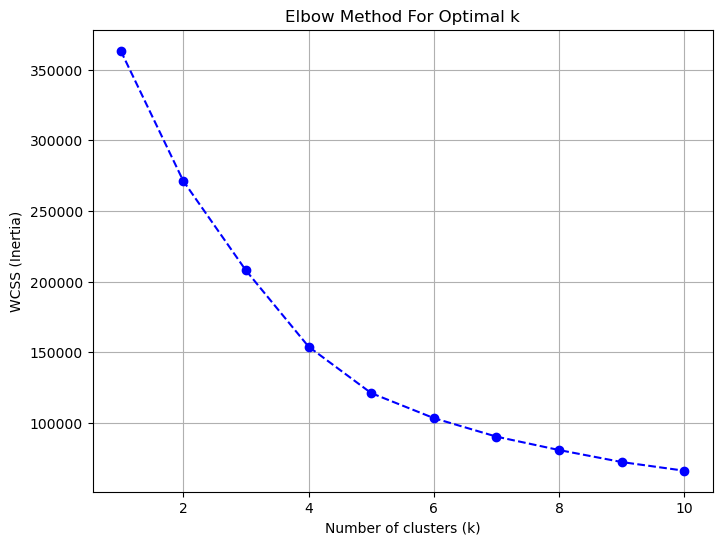

In [22]:
"""
Using elbow plot, determine the optimal k value for k-means clustering. Use below code
"""
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#Calculate the WCSS (inertia) for different values of k
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS (Within-Cluster Sum of Squares)

#Plot the WCSS values against k to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

